# Project : IMDB Movies Analysis
  
 As it is my 1st data science project,this project aim's to do some basic analysis from the 'movie_metadata.csv' dataset. 
 
 This notebook is organized as follows:
 
 * IMDB Movie rating frequency
 * Relationship between Movie score and Director Facebook Popularity 
 * Relationship between Movie score and Cast total Facebook Popularity 
 * All Movies score in defferent Yesr 
 * Country base IMDB Movie score
 * Findiing Correlation 
 * Top Movie Director & Their Movie Rating
     * By the number of Movies they make
     * By the avarage IMDB score 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
reload (sys)
sys.setdefaultencoding('utf-8')


In [9]:
data=pd.read_csv("../input/movie_metadata.csv")
data.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Insight : which score most of the movie get ? 

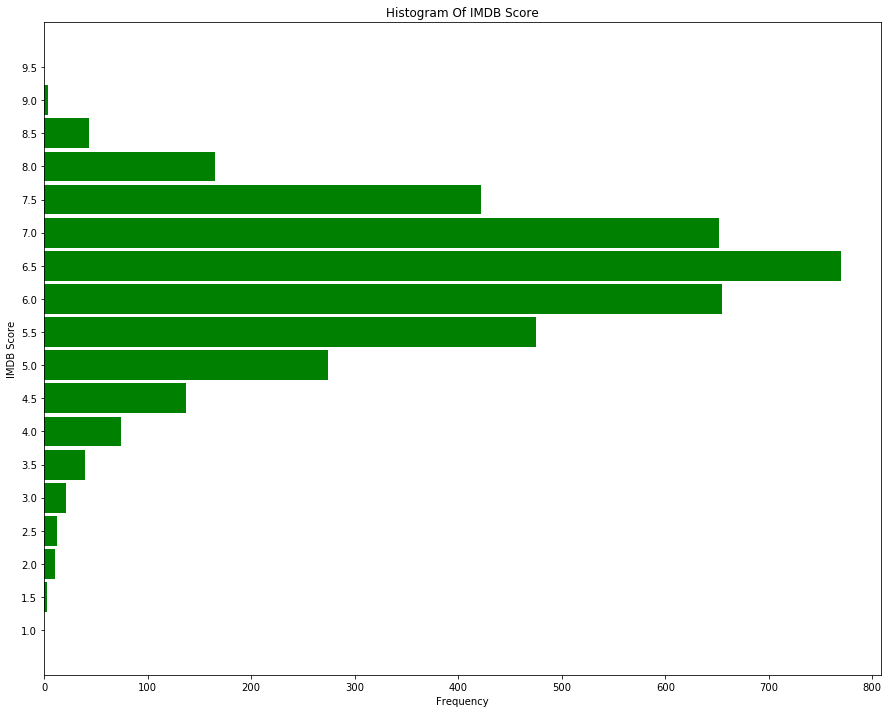

In [34]:
import pylab as pl

imdbScore=[[]]
x=[]

for i in pl.frange(1,9.5,.5):
    imdbScore.append(len(data.imdb_score[(data.imdb_score>=i) & (data.imdb_score<i+.5)]))
    x.append(i)

del(imdbScore[0])

plt.figure(figsize=(15,12))
plt.title("Histogram Of IMDB Score")
plt.ylabel("IMDB Score")
plt.xlabel('Frequency')
plt.barh(x,imdbScore,height=.45 ,color='green')
plt.yticks(x)
plt.show()

As we can see most of the movies are from 6.0 to 7.5 and the consider as  middle class movies . Moveis having rating 8.0+ consider the gretest movie of all time .  

# Insight : Is Movies rating afected by director facebook popularity ?

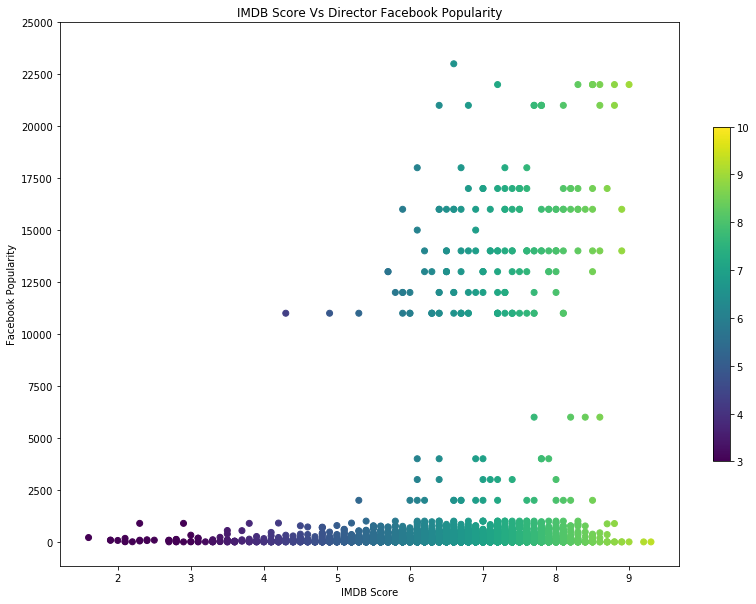

In [27]:
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs Director Facebook Popularity")
plt.xlabel("IMDB Score")
plt.ylabel("Facebook Popularity")
tmp=plt.scatter(data.imdb_score,data.director_facebook_likes,c=data.imdb_score,vmin=3,vmax=10)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

It  is true that director facebook popularity do have an effect on movie rating , but it's not intairly true . There are some famous derector whome movie get bellow 5.0 rating , and there are some others diretor whome are not femous on facebook, but they do make some getest movies of all time .


# Insight : Is Movies rating afected by director facebook popularity ?

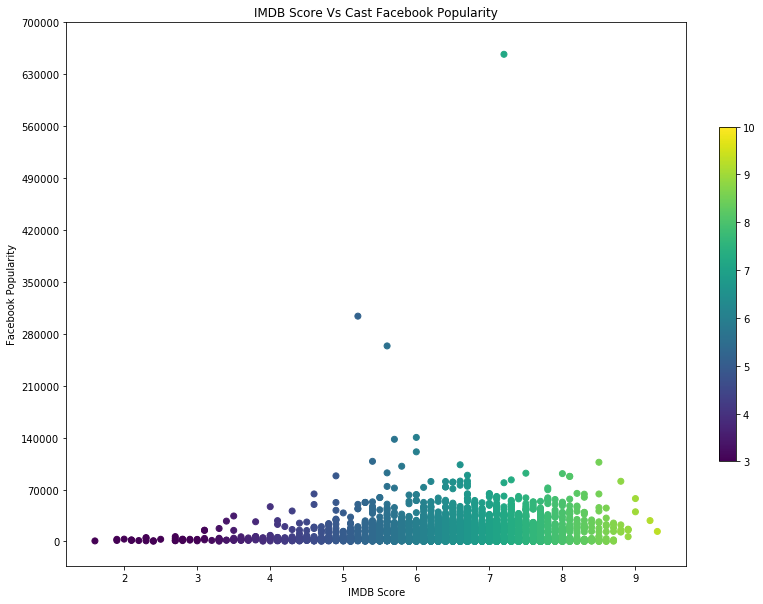

In [26]:
plt.figure(figsize=(12,10))
plt.title("IMDB Score Vs Cast Facebook Popularity")
plt.xlabel("IMDB Score")
plt.ylabel("Facebook Popularity")
tmp=plt.scatter(data.imdb_score,data.cast_total_facebook_likes,c=data.imdb_score,vmin=3,vmax=10)
plt.yticks([i*70000 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

I don't think cast facebook popularity have any effect on movie rating . "The Mummy -2017" is the best example for this :p :p :p 

# IMDB Score vs Year

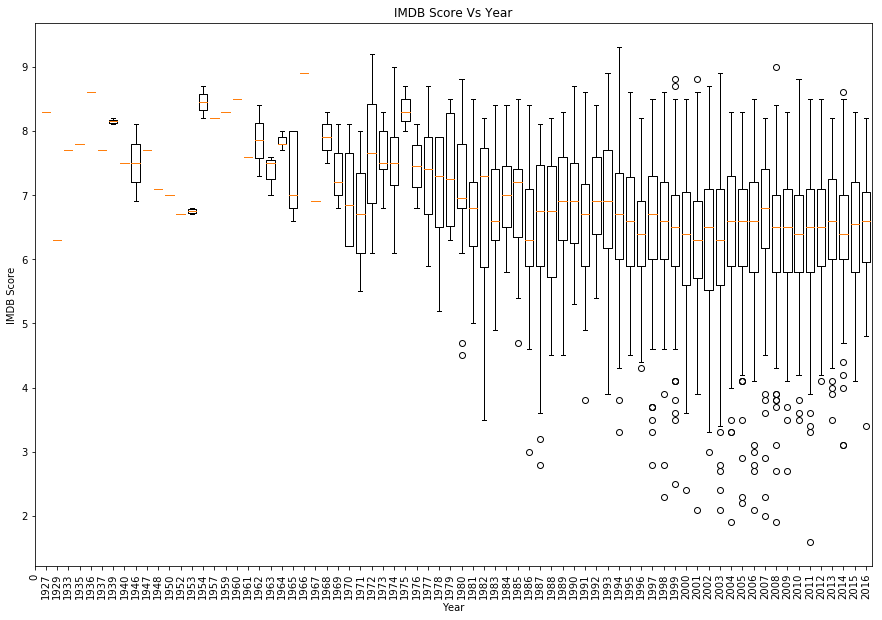

In [25]:
data=data.dropna()
year=(data.title_year.unique()).astype(int)
year=sorted(year)

yearImdbScore=[]
numOfMovieByYear=[]
for i in year:
    tmp=data.imdb_score[data.title_year==i]
    yearImdbScore.append(tmp)
    numOfMovieByYear.append(len(tmp))


#plt.figure(2)
plt.figure(figsize=(15,10))
plt.title("IMDB Score Vs Year")
plt.ylabel("IMDB Score")
plt.xlabel('Year')
plt.boxplot(yearImdbScore,widths=.75)
year=list(np.insert(year,0,0))
plt.xticks(range(len(year)),year,rotation=90,fontsize=10)
plt.show()

del(year[0])

The number of movies annually produced have incresed after 70's , but at the same time number of low rating movies also incresed .

# Insight : Is it true that western countries always make good movies ?

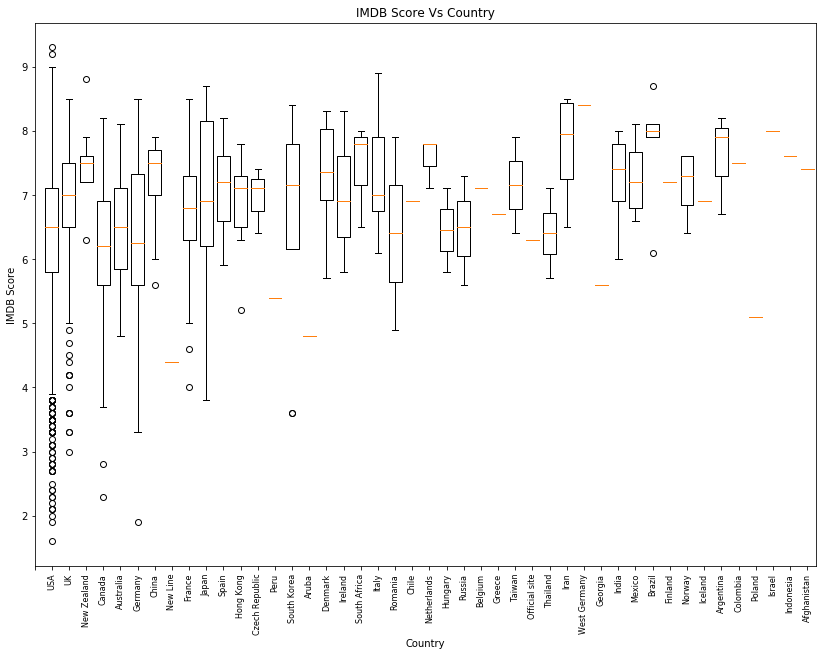

In [24]:


country=data.country.unique()
countryImdbScore=[]

for i in country:
    countryImdbScore.append(data.imdb_score[data.country==i])


country=np.insert(country,0,'')

plt.figure(figsize=(14,10))
plt.title("IMDB Score Vs Country")
plt.ylabel("IMDB Score")
plt.xlabel('Country')
plt.boxplot(countryImdbScore,widths=.75,)
plt.xticks(range(len(country)),country,rotation=90,fontsize=8)
plt.show()

USA & UK made the most number of movies in last 50 years . For this the also made many low rating movies .On the other hand iran,afganistan,brazil has high median rating .

# Correlation

In [16]:
correlation=data.corr()
correlation

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


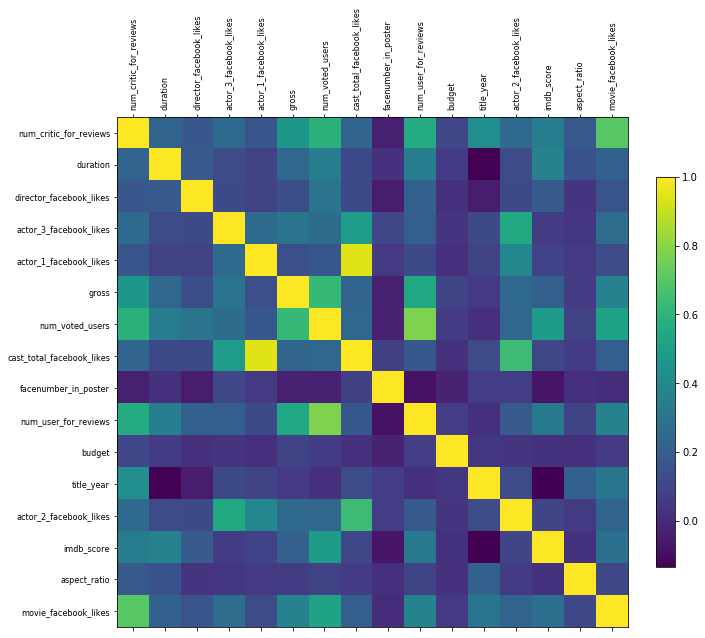

In [35]:
plt.figure(figsize=(10,10))
tmp=plt.matshow(correlation,fignum=1)
plt.xticks(range(len(correlation.columns)),correlation.columns,rotation=90,fontsize=8)
plt.yticks(range(len(correlation.columns)),correlation.columns,fontsize=8)
plt.colorbar(tmp,fraction=0.035)
plt.show()

There is signaficant relation between imdb score and duration,movie facebook like,director facebook like .

# Average Of IMDB Score & Number Of Movies Through Year


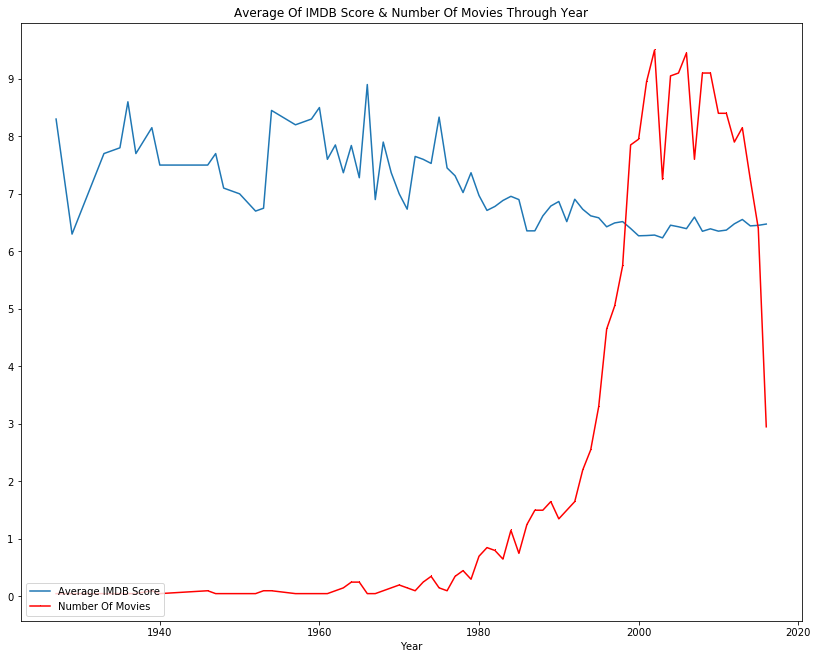

In [36]:
avgimdbScore=[sum(i)/len(i) for i in yearImdbScore]
convertedNumMovie=[i/float(20) for i in numOfMovieByYear]
plt.figure(figsize=(14,11))
plt.title("Average Of IMDB Score & Number Of Movies Through Year")
plt.xlabel('Year')
plt.plot(year,avgimdbScore)
plt.plot(year,convertedNumMovie,',r-')
plt.legend(['Average IMDB Score','Number Of Movies'],loc='lower left')
plt.yticks(range(10))
plt.show()

As we can seenumber of movie produced in a year is increased over time while  avarage movie rating on a year is decreased . So based on this graph ,i can guse,now  producers are not that much focuse on movie's story line/making a good movie/artistic quality of a movie .

# Top Director VS Their Movie imdb rating 
* I divided top director in 2 catagory 
    * Top director base on how many movie they make
    * Top director base on their avarage imdb movie rating 
    
 I don't count thoese directors who made only a single movie 

In [19]:
director=list(data.director_name.unique())
df=pd.DataFrame(columns=['director','directorScoreMean','directorImdbScore','directorMovieNUm'])

for i in director:
    tmp=list(data.imdb_score[data.director_name==i])
    if len(tmp)>1:
        df=df.append({'director': i,'directorScoreMean': sum(tmp)/len(tmp),'directorImdbScore': tmp,'directorMovieNUm' :len(tmp)},ignore_index=True)
    
tmp=(df.sort_values(['directorScoreMean'],ascending=False)).head(25)
directorByMeanScore=list(tmp.director)
directorByMeanScore.reverse()
ScoreByMeanScore=list(tmp.directorImdbScore)
ScoreByMeanScore.reverse()


tmp=(df.sort_values(['directorMovieNUm'],ascending=False)).head(25)
directorByMovieNum =list(tmp.director)
directorByMovieNum.reverse()
ScoreByMovieNum=list(tmp.directorImdbScore)
ScoreByMovieNum.reverse()

# Top Director (based on how many movies they made) Vs Their Movie imdb rating 

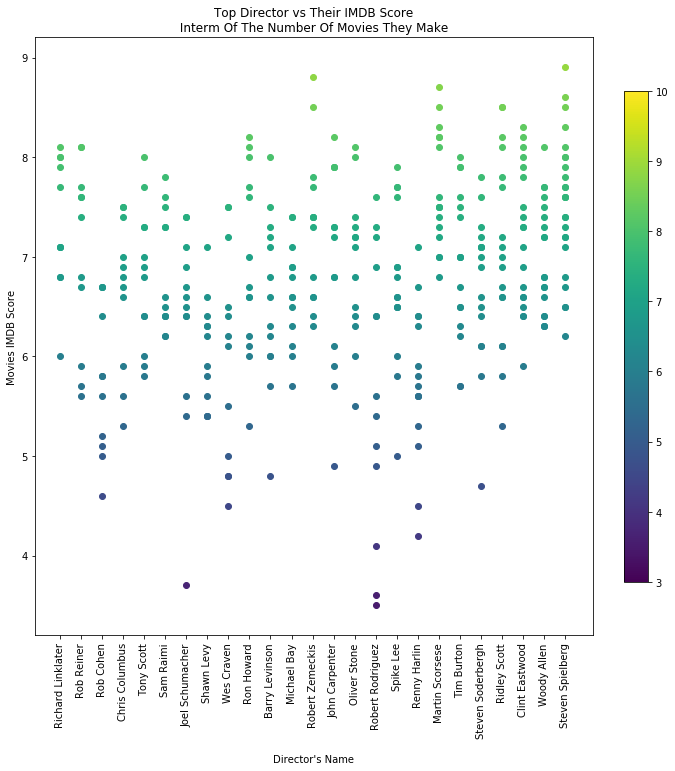

In [37]:
#directorByMovieNum
plt.figure(figsize=(11,11))
for i in range(len(directorByMovieNum)):
    for j in ScoreByMovieNum[i]:
        plt.scatter(i,j,c=j,vmin=3,vmax=10)


#tmp=plt.scatter(c=ScoreByMovieNum)
plt.colorbar(fraction=.04)
plt.title("Top Director vs Their IMDB Score\n Interm Of The Number Of Movies They Make ")
plt.ylabel('Movies IMDB Score')
plt.xlabel("\nDirector's Name")
plt.xticks(range(25),directorByMovieNum,rotation=90)

plt.show()

If a director make many movies it'll obviously increase his/her experianc, but that doesn't mean his/her movie will get hogh rating . Based on this dataset Steven Spielberg made hight number of movie .

# Top Director (based on Their avarage movie rating) VS Their Movie imdb rating 

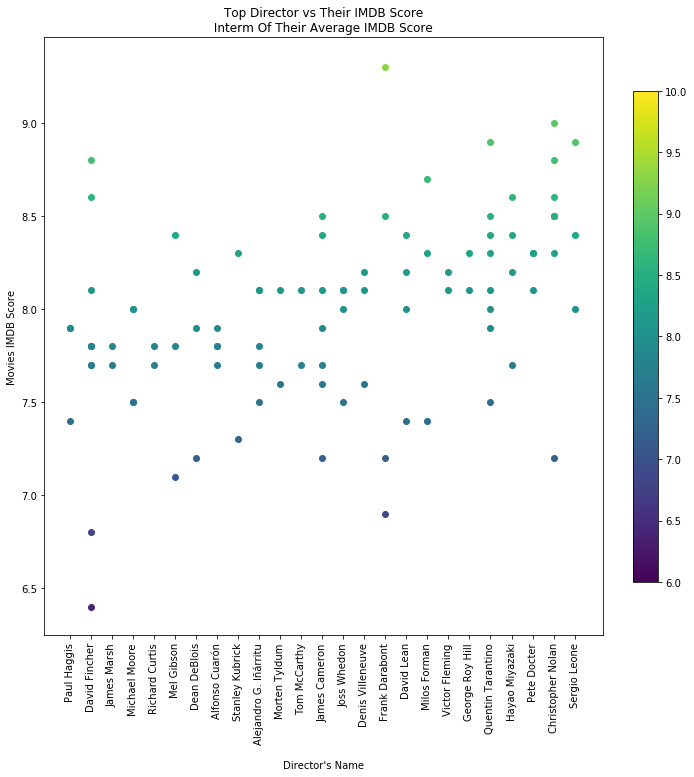

In [38]:
#directorByMeanScore
plt.figure(figsize=(11,11))
for i in range(len(directorByMeanScore)):
    for j in ScoreByMeanScore[i]:
        plt.scatter(i,j,c=j,vmin=6,vmax=10)

plt.xticks(range(25),directorByMeanScore,rotation=90)
plt.title("Top Director vs Their IMDB Score\n Interm Of Their Average IMDB Score ")
plt.ylabel('Movies IMDB Score')
plt.xlabel("\nDirector's Name")
plt.colorbar(fraction=.04)
plt.show()

If a director avarage movie rating is high, that does not mean he/she will always make good movie,on the other hand a director who had a low avarage rating can make a really good movis .  David Fincher is best example for this .

### As it is my first data science project, i know i made so many mistake.So i'll be very much happy if you give your valuable suggestion  .